[youtube](https://youtu.be/pVYATzSoZVA)
[github](https://github.com/SungchulLee/financial_math/tree/master/how%20to%20get%20yahoo%20financial%20data)
[ppt](https://github.com/SungchulLee/financial_math/blob/master/%E1%84%8B%E1%85%A3%E1%84%92%E1%85%AE%20%E1%84%91%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%82%E1%85%A2%E1%86%AB%E1%84%89%E1%85%B3%20%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%20%E1%84%92%E1%85%AC%E1%86%A8%E1%84%83%E1%85%B3%E1%86%A8%E1%84%92%E1%85%A1%E1%84%80%E1%85%B5.pptx)

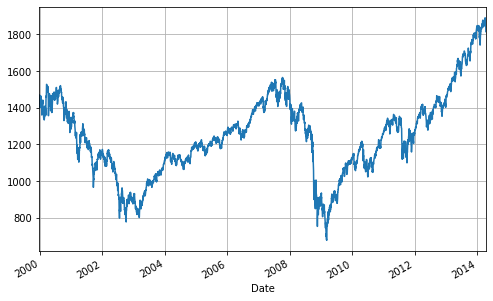

In [2]:
%matplotlib inline
import yfinance as yf
data = yf.Ticker("^GSPC")
sp500 = data.history(start="2000-01-01", end="2014-04-14")
sp500['Close'].plot(grid=True, figsize=(8, 5))

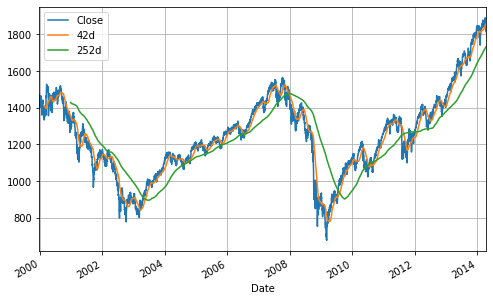

In [5]:
import numpy as np
sp500['42d'] = np.round(sp500['Close'].rolling(42).mean(), 2)
sp500['252d'] = np.round(sp500['Close'].rolling(252).mean(), 2)
sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

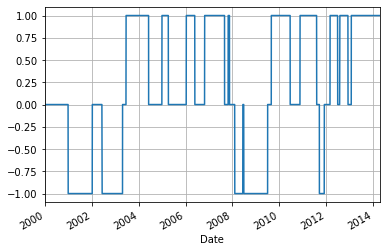

In [9]:
import matplotlib.pyplot as plt
sp500['42-252'] = sp500['42d'] - sp500['252d']
SD = 50
sp500['Signal'] = np.where(sp500['42-252'] > SD, 1, 0) 
sp500['Signal'] = np.where(sp500['42-252'] < -SD, -1, sp500['Signal'])
sp500['Signal'].plot(lw=1.5); plt.ylim([-1.1, 1.1]); plt.grid(True); plt.show()

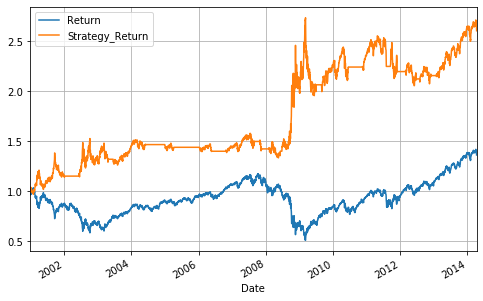

In [22]:
sp500['Position'] = sp500['Signal'].shift(1)
sp500['Return'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
sp500['Strategy_Return'] = sp500['Position'] * sp500['Return']
sp500[['Return', 'Strategy_Return']].iloc[252:,:].cumsum(axis=0).apply(np.exp).plot(
    grid=True, figsize=(8, 5))

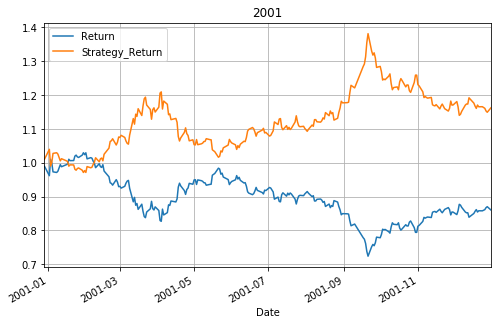

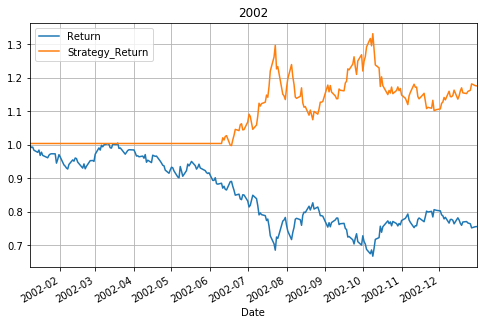

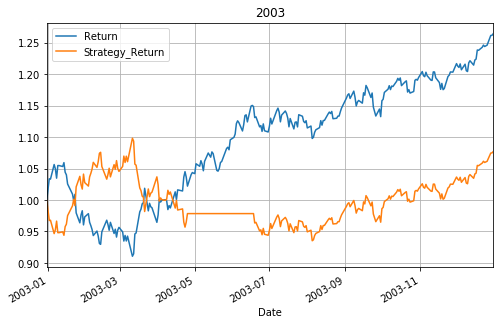

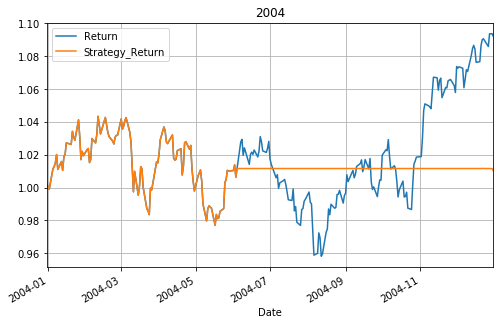

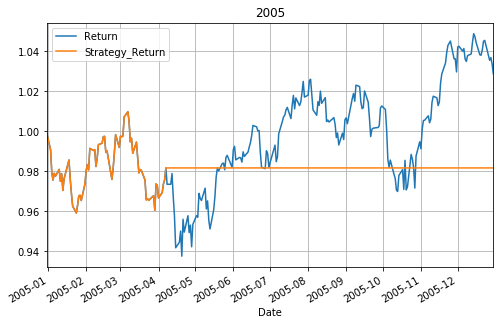

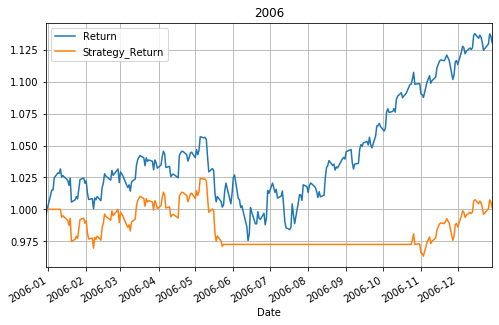

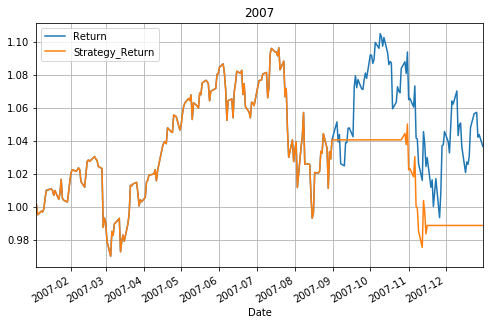

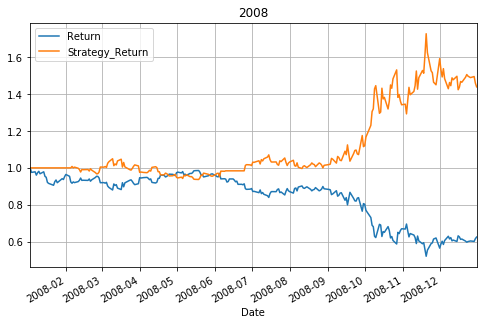

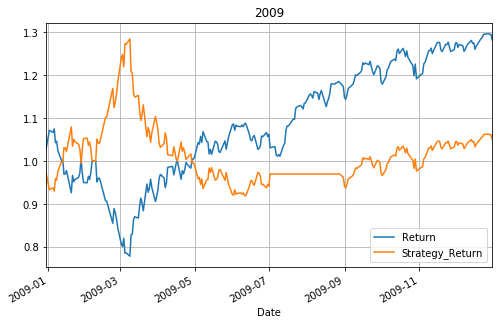

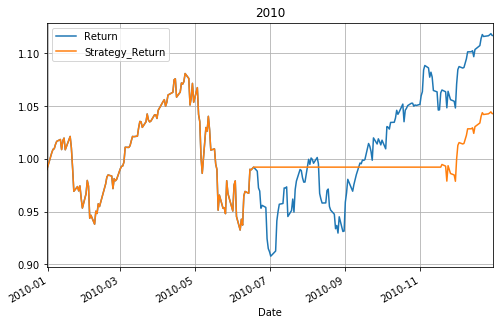

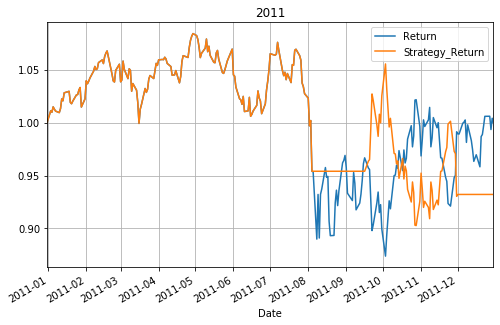

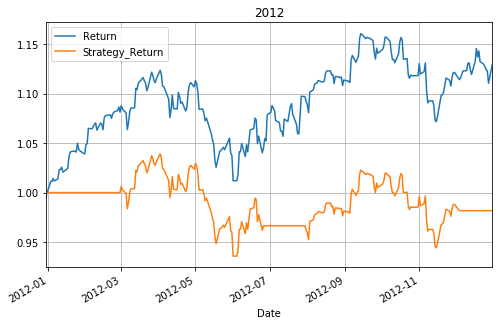

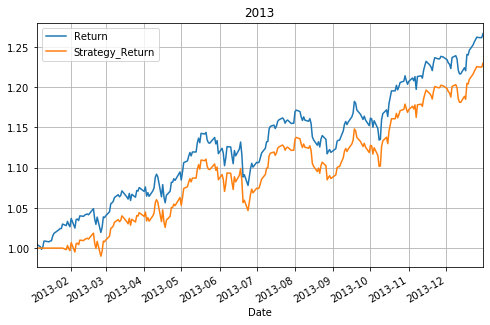

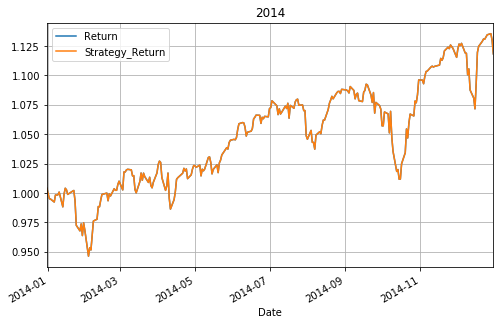

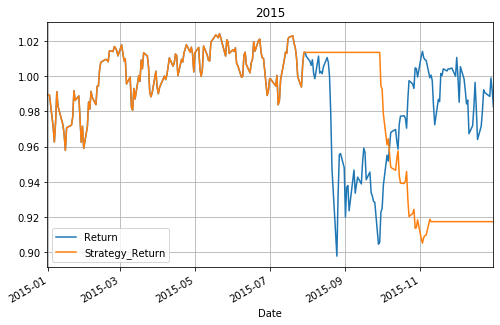

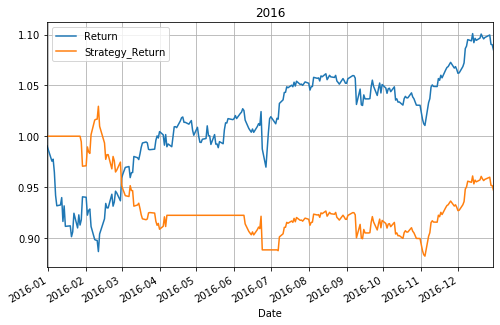

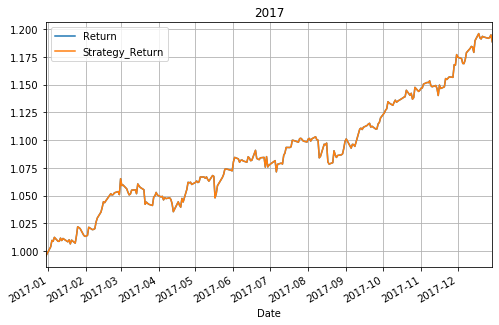

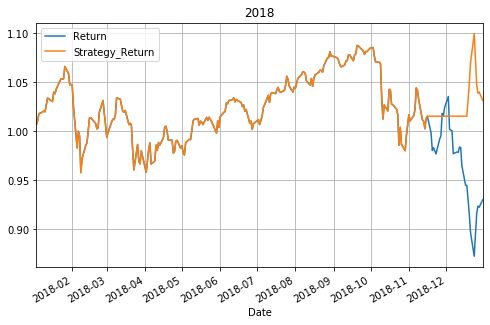

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

for i in range(18):
    if i <= 7:
        start_day = "200{}-01-01".format(str(i))
        title_day = "200{}".format(str(i+1))
        end_day = "200{}-01-01".format(str(i+2))          
    elif i == 8:
        start_day = "200{}-01-01".format(str(i))
        title_day = "200{}".format(str(i+1))
        end_day = "20{}-01-01".format(str(i+2)) 
    elif i == 9:
        start_day = "200{}-01-01".format(str(i))
        title_day = "20{}".format(str(i+1))
        end_day = "20{}-01-01".format(str(i+2))
    else:
        start_day = "20{}-01-01".format(str(i))
        title_day = "20{}".format(str(i+1))
        end_day = "20{}-01-01".format(str(i+2))

    data = yf.Ticker("^GSPC")
    sp500 = data.history(start=start_day, end=end_day)

    sp500['42d'] = np.round(sp500['Close'].rolling(42).mean(), 2)
    sp500['252d'] = np.round(sp500['Close'].rolling(252).mean(), 2)

    sp500['42-252'] = sp500['42d'] - sp500['252d']
    SD = 50
    sp500['Signal'] = np.where(sp500['42-252'] > SD, 1, 0) 
    sp500['Signal'] = np.where(sp500['42-252'] < -SD, -1, sp500['Signal'])

    sp500['Position'] = sp500['Signal'].shift(1)
    sp500['Return'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
    sp500['Strategy_Return'] = sp500['Position'] * sp500['Return'] 
    sp500[['Return', 'Strategy_Return']].iloc[252:,:].cumsum().apply(np.exp).plot(
        grid=True, figsize=(8, 5))
    plt.title(title_day)
    plt.show()